### Natural Language Processing

Natural Language Processing (or NLP for short) is a discipline in computing that deals with the communication between natural (human) languages and computer languages. A common example of NLP is something like spellcheck or autocomplete. Essentially NLP is the field that focuses on how computers can understand and/or process natural/human languages.

### Recurrent Neural Networks 1

We will introduce a new kind of neural network that is much more capable of processing sequential data such as text or characters called a recurrent neural network (RNN for short).

We will learn how to use a reccurent neural network to do the following:
- Sentiment Analysis
- Character Generation

RNN's are complex and come in many different forms so in this tutorial we wil focus on how they work and the kind of problems they are best suited for.

#### Sequence Data

Since textual data contains many words that follow in a very specific and meaningful order, we need to be able to keep track of each word and when it occurs in the data. Simply encoding say an entire paragraph of text into one data point wouldn't give us a very meaningful picture of the data and would be very difficult to do anything with. This is why we treat text as a sequence and process one word at a time. We will keep track of where each of these words appear and use that information to try to understand the meaning of pieces of text.

#### Encoding Text

As we know machine learning models and neural networks don't take raw text data as an input. This means we must somehow encode our textual data to numeric values that our models can understand. There are many different ways of doing this and we will look at a few examples below.

Before we get into the different encoding/preprocessing methods let's understand the information we can get from textual data by looking at the following two movie reviews.

```I thought the movie was going to be bad, but it was actually amazing!```

```I thought the movie was going to be amazing, but it was actually bad!```

Although these two setences are very similar we know that they have very different meanings. This is because of the ordering of words, a very important property of textual data.

Now keep that in mind while we consider some different ways of encoding our textual data.

#### Bag of Words
The first and simplest way to encode our data is to use something called **bag of words**. This is a pretty easy technique where each word in a sentence is encoded with an integer and thrown into a collection that does not maintain the order of the words but does keep track of the frequency. Have a look at the python function below that encodes a string of text into bag of words. 

In [ ]:
vocab = {}  # maps word to integer representing it
word_encoding = 1
def bag_of_words(text):
  global word_encoding

  words = text.lower().split(" ")  # create a list of all of the words in the text, well assume there is no grammar in our text for this example
  bag = {}  # stores all of the encodings and their frequency

  for word in words:
    if word in vocab:
      encoding = vocab[word]  # get encoding from vocab
    else:
      vocab[word] = word_encoding
      encoding = word_encoding
      word_encoding += 1
    
    if encoding in bag:
      bag[encoding] += 1
    else:
      bag[encoding] = 1
  
  return bag

text = "this is a test to see if this test will work is is test a a"
bag = bag_of_words(text)
print(bag)
print(vocab)

{1: 2, 2: 3, 3: 3, 4: 3, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}
{'this': 1, 'is': 2, 'a': 3, 'test': 4, 'to': 5, 'see': 6, 'if': 7, 'will': 8, 'work': 9}


This isn't really the way we would do this in practice, but I hope it gives you an idea of how bag of words works. Notice that we've lost the order in which words appear. In fact, let's look at how this encoding works for the two sentences we showed above.


In [ ]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

pos_bag = bag_of_words(positive_review)
neg_bag = bag_of_words(negative_review)

print("Positive:", pos_bag)
print("Negative:", neg_bag)

Positive: {10: 1, 11: 1, 12: 1, 13: 1, 14: 2, 15: 1, 5: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1}
Negative: {10: 1, 11: 1, 12: 1, 13: 1, 14: 2, 15: 1, 5: 1, 16: 1, 21: 1, 18: 1, 19: 1, 20: 1, 17: 1}


#### Integer Encoding

The next technique we will look at is called **integer encoding**. This involves representing each word or character in a sentence as a unique integer and maintaining the order of these words. This should hopefully fix the problem we saw before were we lost the order of words.

In [ ]:
vocab = {}  
word_encoding = 1
def one_hot_encoding(text):
  global word_encoding

  words = text.lower().split(" ") 
  encoding = []  

  for word in words:
    if word in vocab:
      code = vocab[word]  
      encoding.append(code) 
    else:
      vocab[word] = word_encoding
      encoding.append(word_encoding)
      word_encoding += 1
  
  return encoding

text = "this is a test to see if this test will work is is test a a"
encoding = one_hot_encoding(text)
print(encoding)
print(vocab)

[1, 2, 3, 4, 5, 6, 7, 1, 4, 8, 9, 2, 2, 4, 3, 3]
{'this': 1, 'is': 2, 'a': 3, 'test': 4, 'to': 5, 'see': 6, 'if': 7, 'will': 8, 'work': 9}


In [ ]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

pos_encode = one_hot_encoding(positive_review)
neg_encode = one_hot_encoding(negative_review)

print("Positive:", pos_encode)
print("Negative:", neg_encode)

Positive: [10, 11, 12, 13, 14, 15, 5, 16, 17, 18, 19, 14, 20, 21]
Negative: [10, 11, 12, 13, 14, 15, 5, 16, 21, 18, 19, 14, 20, 17]


Now we are keeping track of the order of words and we can tell where each occurs. But this still has a few issues with it. Ideally when we encode words, we would like similar words to have similar labels and different words to have very different labels. For example, the words happy and joyful should probably have very similar labels so we can determine that they are similar. While words like horrible and amazing should probably have very different labels. The method we looked at above won't be able to do something like this for us. This could mean that the model will have a very difficult time determing if two words are similar or not which could result in some pretty drastic performace impacts.

#### Word Embeddings
Luckily there is a third method that is far superior, **word embeddings**. This method keeps the order of words intact as well as encodes similar words with very similar labels. It attempts to not only encode the frequency and order of words but the meaning of those words in the sentence. It encodes each word as a dense vector that represents its context in the sentence.

Unlike the previous techniques word embeddings are learned by looking at many different training examples. You can add what's called an *embedding layer* to the beginning of your model and while your model trains your embedding layer will learn the correct embeddings for words. You can also use pretrained embedding layers.

This is the technique we will use for our examples and its implementation will be showed later on.


#### RNN

A RNN will process one word at a time while maintaining an internal memory of what it's already seen. This will allow it to treat words differently based on their order in a sentence and to slowly build an understanding of the entire input, one word at a time.

This is why we are treating our text data as a sequence! So that we can pass one word at a time to the RNN.

Let's have a look at what a recurrent layer might look like.

![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png)
*Source: https://colah.github.io/posts/2015-08-Understanding-LSTMs/*

Let's define what all these variables stand for before we get into the explination.

**h<sub>t</sub>** output at time t

**x<sub>t</sub>** input at time t

**A** Recurrent Layer (loop)

What this diagram is trying to illustrate is that a recurrent layer processes words or input one at a time in a combination with the output from the previous iteration. So, as we progress further in the input sequence, we build a more complex understanding of the text as a whole.

What we've just looked at is called a **simple RNN layer**. It can be effective at processing shorter sequences of text for simple problems but has many downfalls associated with it. One of them being the fact that as text sequences get longer it gets increasingly difficult for the network to understand the text properly.



#### Sentiment Analysis
And now time to see a recurrent neural network in action. For this example, we are going to do something called sentiment analysis.

The formal definition of this term from Wikipedia is as follows:

*the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.*

#### Movie Review Dataset
Well start by loading in the IMDB movie review dataset from tf. This dataset contains 25,000 reviews from IMDB where each one is already preprocessed and has a label as either positive or negative. Each review is encoded by integers that represents how common a word is in the entire dataset. For example, a word encoded by the integer 3 means that it is the 3rd most common word in the dataset.
 


In [ ]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

#### Setup input pipeline

The IMDB large movie review dataset is a binary classification dataset—all the reviews have either a positive or negative sentiment.

In [ ]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

2023-05-25 11:26:27.421954: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dataset imdb_reviews downloaded and prepared to /Users/arjan1/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

Initially this returns a dataset of (text, label pairs):

In [ ]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0


2023-05-25 11:30:42.351986: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Next shuffle the data for training and create batches of these (text, label) pairs:

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'From the first moment, this "thing" is just an awful sequence of extremely short cuts of blurry camera work. While the overall plot has every potential for a thriller, the story is so badly told that I\'m unable to buy it. From the middle of the film, the actions of characters don\'t make sense to me. Stop reading now to avoid SPOILERS.<br /><br />For instance, Ed\'s idea to have Edna make coffee for them after having shot off her son\'s arm is way below his alleged experience; it\'s just an extremely stupid idea. Domino not questioning the fragmentary orders she receives from Claremont Williams over a breaking-up phone connection just eludes me; shouldn\'t she be long suspicious that Williams is turning them in? Those FBI agents seem out of their minds showing up with just one single helicopter to something they have every reason to consider a capital mafia shoot-out. Besides, what they do by withholding and leaking information towards Cigliutti is pretty much incitement to

2023-05-25 11:32:23.431180: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


#### Create the text encoder

The raw text loaded by tfds needs to be processed before it can be used in a model. The simplest way to process text for training is using the TextVectorization layer. This layer has many capabilities, but this tutorial sticks to the default behavior.

Create the layer, and pass the dataset's text to the layer's .adapt method:

In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


The .adapt method sets the layer's vocabulary. Here are the first 20 tokens. After the padding and unknown tokens they're sorted by frequency:

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

Once the vocabulary is set, the layer can encode text into indices. The tensors of indices are 0-padded to the longest sequence in the batch (unless you set a fixed output_sequence_length):

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[36,  2, 86, ...,  0,  0,  0],
       [ 2,  1,  1, ...,  0,  0,  0],
       [45, 23, 63, ...,  0,  0,  0]])

With the default settings, the process is not completely reversible. There are three main reasons for that:

1. The default value for `preprocessing.TextVectorization`'s `standardize` argument is `"lower_and_strip_punctuation"`.
2. The limited vocabulary size and lack of character-based fallback results in some unknown tokens.

In [ ]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'From the first moment, this "thing" is just an awful sequence of extremely short cuts of blurry camera work. While the overall plot has every potential for a thriller, the story is so badly told that I\'m unable to buy it. From the middle of the film, the actions of characters don\'t make sense to me. Stop reading now to avoid SPOILERS.<br /><br />For instance, Ed\'s idea to have Edna make coffee for them after having shot off her son\'s arm is way below his alleged experience; it\'s just an extremely stupid idea. Domino not questioning the fragmentary orders she receives from Claremont Williams over a breaking-up phone connection just eludes me; shouldn\'t she be long suspicious that Williams is turning them in? Those FBI agents seem out of their minds showing up with just one single helicopter to something they have every reason to consider a capital mafia shoot-out. Besides, what they do by withholding and leaking information towards Cigliutti is pretty much incitement 

#### Create the model

![A drawing of the information flow in the model](bidirectional.png)

Above is a diagram of the model. 

1. This model can be build as a `tf.keras.Sequential`.

2. The first layer is the `encoder`, which converts the text to a sequence of token indices.

3. After the encoder is an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices to sequences of vectors. These vectors are trainable. After training (on enough data), words with similar meanings often have similar vectors.

  This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a `tf.keras.layers.Dense` layer.

4. A recurrent neural network (RNN) processes sequence input by iterating through the elements. RNNs pass the outputs from one timestep to their input on the next timestep.

  The `tf.keras.layers.Bidirectional` wrapper can also be used with an RNN layer. This propagates the input forward and backwards through the RNN layer and then concatenates the final output. 

  * The main advantage of a bidirectional RNN is that the signal from the beginning of the input doesn't need to be processed all the way through every timestep to affect the output.  

  * The main disadvantage of a bidirectional RNN is that you can't efficiently stream predictions as words are being added to the end.

5. After the RNN has converted the sequence to a single vector the two `layers.Dense` do some final processing, and convert from this vector representation to a single logit as the classification output. 

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

 Keras sequential model is used here since all the layers in the model only have single input and produce single output. In case you want to use stateful RNN layer, you might want to build your model with Keras functional API or model subclassing so that you can retrieve and reuse the RNN layer states. 
 
The embedding layer uses masking to handle the varying sequence-lengths. All the layers after the Embedding support masking:

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


To confirm that this works as expected, evaluate a sentence twice. First, alone so there's no padding to mask:

In [ ]:
# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

1/1 [==============================] - 1s 1s/step
[0.00653337]


Now, evaluate it again in a batch with a longer sentence. The result should be identical:

In [ ]:
# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

1/1 [==============================] - 0s 263ms/step
[0.00653337]


Compile the Keras model to configure the training process:

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

#### Train the model

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 175s 438ms/step - loss: 0.6376 - accuracy: 0.5748 - val_loss: 0.4949 - val_accuracy: 0.7958
Epoch 2/10


2023-05-25 11:42:48.527999: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


391/391 [==============================] - 169s 433ms/step - loss: 0.3884 - accuracy: 0.8225 - val_loss: 0.3622 - val_accuracy: 0.8333
Epoch 3/10


2023-05-25 11:45:37.856824: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


391/391 [==============================] - 173s 442ms/step - loss: 0.3340 - accuracy: 0.8525 - val_loss: 0.3516 - val_accuracy: 0.8531
Epoch 4/10


2023-05-25 11:48:30.623174: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


391/391 [==============================] - 172s 440ms/step - loss: 0.3202 - accuracy: 0.8616 - val_loss: 0.3293 - val_accuracy: 0.8495
Epoch 5/10


2023-05-25 11:51:22.645038: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


391/391 [==============================] - 173s 443ms/step - loss: 0.3137 - accuracy: 0.8649 - val_loss: 0.3270 - val_accuracy: 0.8547
Epoch 6/10


2023-05-25 11:54:15.834190: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


391/391 [==============================] - 171s 436ms/step - loss: 0.3074 - accuracy: 0.8674 - val_loss: 0.3219 - val_accuracy: 0.8568
Epoch 7/10


2023-05-25 11:57:06.375395: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


391/391 [==============================] - 169s 432ms/step - loss: 0.3046 - accuracy: 0.8698 - val_loss: 0.3254 - val_accuracy: 0.8573
Epoch 8/10


2023-05-25 11:59:55.386214: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


391/391 [==============================] - 173s 443ms/step - loss: 0.3026 - accuracy: 0.8687 - val_loss: 0.3232 - val_accuracy: 0.8500
Epoch 9/10


2023-05-25 12:02:48.536281: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


391/391 [==============================] - 171s 437ms/step - loss: 0.2996 - accuracy: 0.8704 - val_loss: 0.3287 - val_accuracy: 0.8557
Epoch 10/10


2023-05-25 12:05:39.262051: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


391/391 [==============================] - 173s 443ms/step - loss: 0.2973 - accuracy: 0.8732 - val_loss: 0.3198 - val_accuracy: 0.8599


2023-05-25 12:08:32.461297: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 53s 137ms/step - loss: 0.3144 - accuracy: 0.8602
Test Loss: 0.3144073188304901
Test Accuracy: 0.8601599931716919


(0.0, 0.6545749068260193)

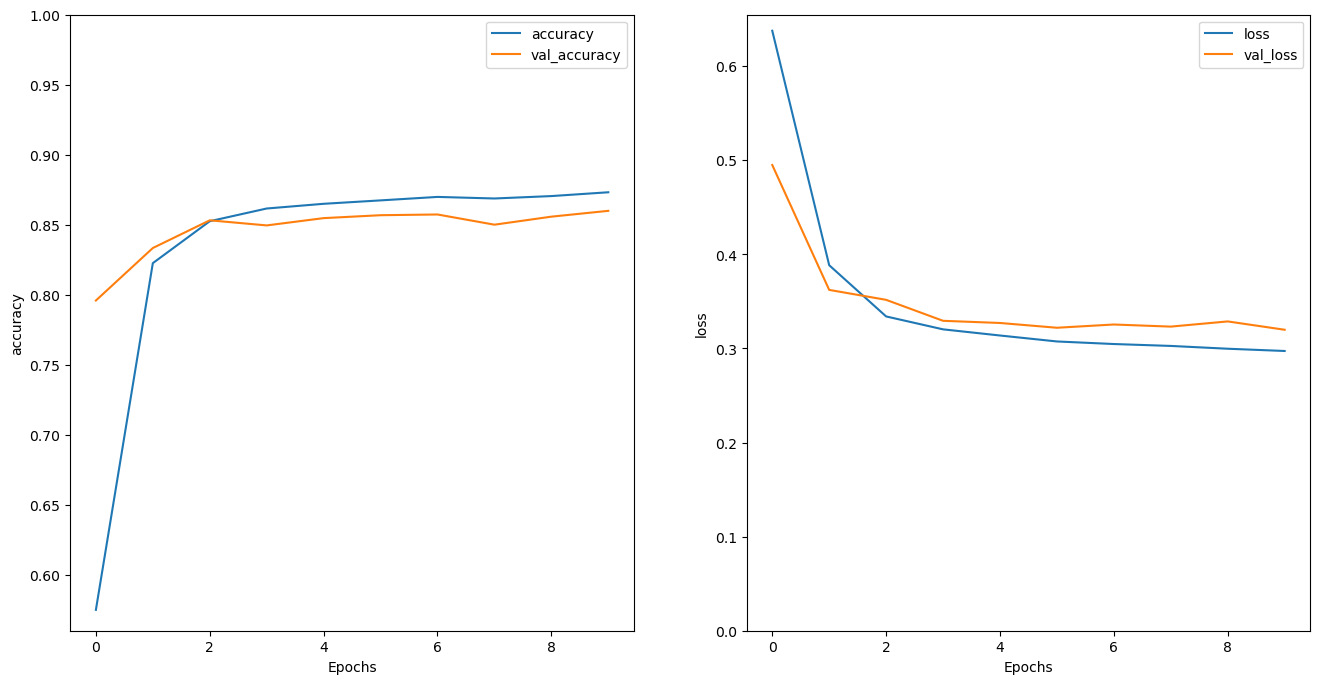

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

Run a prediction on a new sentence:

If the prediction is >= 0.0, it is positive else it is negative.

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))

1/1 [==============================] - 1s 1s/step


#### Stack two or more LSTM layers

Keras recurrent layers have two available modes that are controlled by the `return_sequences` constructor argument:

* If `False` it returns only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features)). This is the default, used in the previous model.

* If `True` the full sequences of successive outputs for each timestep is returned (a 3D tensor of shape `(batch_size, timesteps, output_features)`).

Here is what the flow of information looks like with `return_sequences=True`:

![layered_bidirectional](layered_bidirectional.png)


In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=2,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 338s 846ms/step - loss: 0.6229 - accuracy: 0.5910 - val_loss: 0.4381 - val_accuracy: 0.8047
Epoch 2/10
391/391 [==============================] - 329s 840ms/step - loss: 0.3983 - accuracy: 0.8221 - val_loss: 0.3613 - val_accuracy: 0.8344
Epoch 3/10
391/391 [==============================] - 322s 823ms/step - loss: 0.3364 - accuracy: 0.8532 - val_loss: 0.3381 - val_accuracy: 0.8484
Epoch 4/10
391/391 [==============================] - 322s 825ms/step - loss: 0.3214 - accuracy: 0.8628 - val_loss: 0.3282 - val_accuracy: 0.8589
Epoch 5/10
391/391 [==============================] - 325s 832ms/step - loss: 0.3111 - accuracy: 0.8665 - val_loss: 0.3346 - val_accuracy: 0.8620
Epoch 6/10
391/391 [==============================] - 311s 794ms/step - loss: 0.3065 - accuracy: 0.8688 - val_loss: 0.3201 - val_accuracy: 0.8536
Epoch 7/10
391/391 [==============================] - 616s 2s/step - loss: 0.3020 - accuracy: 0.8691 - val_loss: 0.3209 - va

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 93s 239ms/step - loss: 0.3221 - accuracy: 0.8460
Test Loss: 0.32205188274383545
Test Accuracy: 0.8460400104522705


In [ ]:
# predict on a sample text without padding.

sample_text = ('The movie was not good. The animation and the graphics '
               'were terrible. I would not recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 3s 3s/step
[[-1.9129493]]


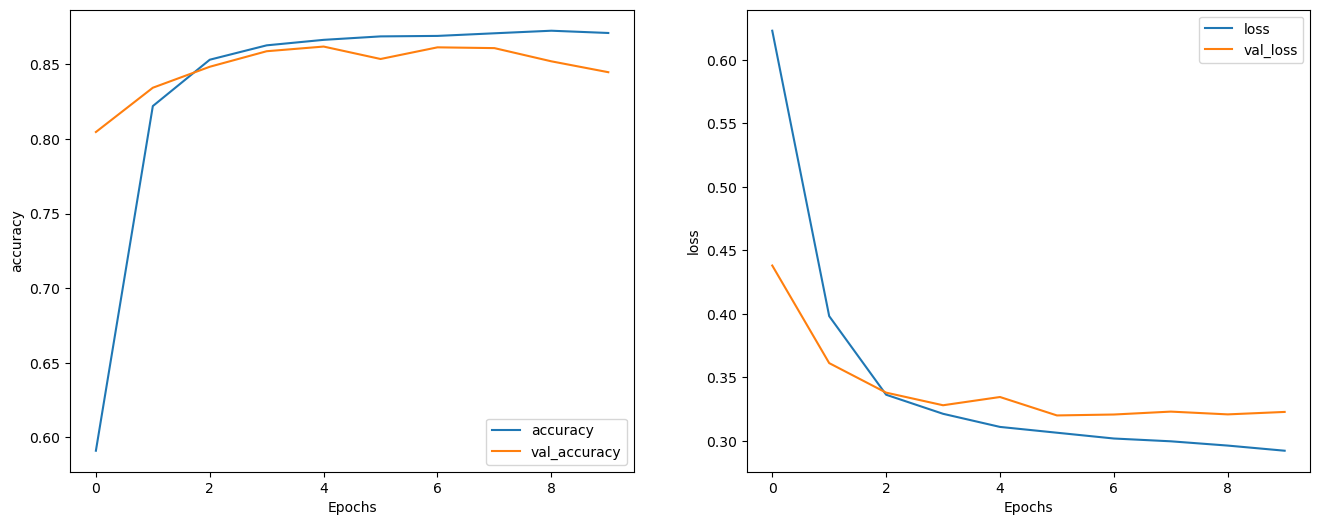

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

### Recurrent Neural Network 2

#### RNN Play Generator

This tutorial demonstrates how to generate text using a character-based RNN. You will work with a dataset of Shakespeare's writing from Andrej Karpathy's [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). Given a sequence of characters from this data ("Shakespear"), train a model to predict the next character in the sequence ("e"). Longer sequences of text can be generated by calling the model repeatedly.

Note: Enable GPU acceleration to execute this notebook faster. In Colab: *Runtime > Change runtime type > Hardware accelerator > GPU*.

This tutorial includes runnable code implemented using [tf.keras](https://www.tensorflow.org/guide/keras/sequential_model) and [eager execution](https://www.tensorflow.org/guide/eager). The following is the sample output when the model in this tutorial trained for 30 epochs, and started with the prompt "Q":

<pre>
QUEENE:
I had thought thou hadst a Roman; for the oracle,
Thus by All bids the man against the word,
Which are so weak of care, by old care done;
Your children were in your holy love,
And the precipitation through the bleeding throne.

BISHOP OF ELY:
Marry, and will, my lord, to weep in such a one were prettiest;
Yet now I was adopted heir
Of the world's lamentable day,
To watch the next way with his father with his face?

ESCALUS:
The cause why then we are all resolved more sons.

VOLUMNIA:
O, no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, it is no sin it should be dead,
And love and pale as any will to that word.

QUEEN ELIZABETH:
But how long have I heard the soul for this world,
And show his hands of life be proved to stand.

PETRUCHIO:
I say he look'd on, if I must be content
To stay him from the fatal of our country's bliss.
His lordship pluck'd from this sentence then for prey,
And then let us twain, being the moon,
were she such a case as fills m
</pre>

While some of the sentences are grammatical, most do not make sense. The model has not learned the meaning of words, but consider:

* The model is character-based. When training started, the model did not know how to spell an English word, or that words were even a unit of text.

* The structure of the output resembles a play—blocks of text generally begin with a speaker name, in all capital letters similar to the dataset.

* As demonstrated below, the model is trained on small batches of text (100 characters each), and is still able to generate a longer sequence of text with coherent structure.

#### Import/ Dataset

In [2]:
import tensorflow as tf

import numpy as np
import os
import time

In [3]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1115394/1115394 [==============================] - 1s 1us/step


#### Read Data

In [4]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')

Length of text: 1115394 characters


In [5]:
# Take a look at the first 250 characters in text
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



#### Encoding

We are going to encode each unique character as a different integer

In [6]:
vocab = sorted(set(text))
# Creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

def text_to_int(text):
  return np.array([char2idx[c] for c in text])

text_as_int = text_to_int(text)

In [7]:
# lets look at how part of our text is encoded
print("Text:", text[:13])
print("Encoded:", text_to_int(text[:13]))

Text: First Citizen
Encoded: [18 47 56 57 58  1 15 47 58 47 64 43 52]


And here we will make a function that can convert our numeric values to text.


In [8]:
def int_to_text(ints):
  try:
    ints = ints.numpy()
  except:
    pass
  return ''.join(idx2char[ints])

print(int_to_text(text_as_int[:13]))

First Citizen


#### Creating Training Examples
Remember our task is to feed the model a sequence and have it return to us the next character. This means we need to split our text data from above into many shorter sequences that we can pass to the model as training examples. 

The training examples we will prepapre will use a *seq_length* sequence as input and a *seq_length* sequence as the output where that sequence is the original sequence shifted one letter to the right. For example:

```input: Hell | output: ello```

Our first step will be to create a stream of characters from our text data.

In [9]:
seq_length = 100  # length of sequence for a training example
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

Next we can use the batch method to turn this stream of characters into batches of desired length.

In [10]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

Now we need to use these sequences of length 101 and split them into input and output.

In [11]:
def split_input_target(chunk):  # for the example: hello
    input_text = chunk[:-1]  # hell
    target_text = chunk[1:]  # ello
    return input_text, target_text  # hell, ello

dataset = sequences.map(split_input_target)  # we use map to apply the above function to every entry

In [12]:
for x, y in dataset.take(2):
  print("\n\nEXAMPLE\n")
  print("INPUT")
  print(int_to_text(x))
  print("\nOUTPUT")
  print(int_to_text(y))



EXAMPLE

INPUT
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You

OUTPUT
irst Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You 


EXAMPLE

INPUT
are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you 

OUTPUT
re all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you k


Finally we need to make training batches.

In [13]:
BATCH_SIZE = 64
VOCAB_SIZE = len(vocab)  # vocab is number of unique characters
EMBEDDING_DIM = 256
RNN_UNITS = 1024

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

data = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

#### Building the Model

Now it is time to build the model. We will use an embedding layer a LSTM and one dense layer that contains a node for each unique character in our training data. The dense layer will give us a probability distribution over all nodes.

In [14]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

model = build_model(VOCAB_SIZE,EMBEDDING_DIM, RNN_UNITS, BATCH_SIZE)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (64, None, 256)           16640     
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dense (Dense)               (64, None, 65)            66625     
                                                                 
Total params: 5,330,241
Trainable params: 5,330,241
Non-trainable params: 0
_________________________________________________________________


#### Creating a Loss Function
Now we are going to create our own loss function for this problem. This is because our model will output a (64, sequence_length, 65) shaped tensor that represents the probability distribution of each character at each timestep for every sequence in the batch. 


In [15]:
for input_example_batch, target_example_batch in data.take(1):
  example_batch_predictions = model(input_example_batch)  # ask our model for a prediction on our first batch of training data (64 entries)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")  # print out the output shape

(64, 100, 65) # (batch_size, sequence_length, vocab_size)


In [16]:
# we can see that the prediction is an array of 64 arrays, one for each entry in the batch
print(len(example_batch_predictions))
print(example_batch_predictions)

64
tf.Tensor(
[[[ 3.98045871e-03 -4.58885171e-03  4.61864332e-03 ... -1.02732948e-03
   -4.60791867e-03  2.02289969e-03]
  [-7.98046822e-05 -3.71021521e-03  8.77339207e-03 ... -6.65799016e-04
   -5.52078651e-04  5.61633985e-03]
  [-2.38948828e-03 -6.93524349e-03  8.40872899e-03 ... -3.52318911e-03
    4.54840669e-03  7.96181848e-04]
  ...
  [ 4.08200640e-03 -3.86140565e-03 -2.75661005e-03 ...  8.17332696e-03
   -1.56212132e-03  1.71680236e-03]
  [ 1.41169317e-03 -3.86792608e-03  3.84084694e-03 ...  7.78932683e-03
    1.36527047e-03  5.44385053e-03]
  [-4.04535420e-03 -1.51988422e-03  9.35811549e-05 ...  6.13624975e-03
   -1.64250750e-03  4.96495003e-03]]

 [[-2.12614168e-03  4.08605207e-04 -2.44634948e-03 ... -2.63780775e-03
    1.56441366e-03  4.73235734e-04]
  [ 3.60978232e-03 -1.56092620e-03  8.32511927e-04 ... -5.27932495e-03
    9.09621641e-03  3.95157700e-03]
  [ 6.54724776e-04 -9.32949595e-04  4.70205024e-03 ... -2.51764944e-03
    9.83949751e-03  5.98192727e-03]
  ...
  [ 2.630

In [17]:
# lets examine one prediction
pred = example_batch_predictions[0]
print(len(pred))
print(pred)
# notice this is a 2d array of length 100, where each interior array is the prediction for the next character at each time step

100
tf.Tensor(
[[ 3.9804587e-03 -4.5888517e-03  4.6186433e-03 ... -1.0273295e-03
  -4.6079187e-03  2.0228997e-03]
 [-7.9804682e-05 -3.7102152e-03  8.7733921e-03 ... -6.6579902e-04
  -5.5207865e-04  5.6163399e-03]
 [-2.3894883e-03 -6.9352435e-03  8.4087290e-03 ... -3.5231891e-03
   4.5484067e-03  7.9618185e-04]
 ...
 [ 4.0820064e-03 -3.8614057e-03 -2.7566100e-03 ...  8.1733270e-03
  -1.5621213e-03  1.7168024e-03]
 [ 1.4116932e-03 -3.8679261e-03  3.8408469e-03 ...  7.7893268e-03
   1.3652705e-03  5.4438505e-03]
 [-4.0453542e-03 -1.5198842e-03  9.3581155e-05 ...  6.1362498e-03
  -1.6425075e-03  4.9649500e-03]], shape=(100, 65), dtype=float32)


In [20]:
# and finally well look at a prediction at the first timestep
time_pred = pred[0]
print(len(time_pred))
print(time_pred)
# and of course its 65 values representing the probabillity of each character occuring next

65
tf.Tensor(
[ 3.9804587e-03 -4.5888517e-03  4.6186433e-03 -8.5350237e-04
 -3.7942221e-03 -4.6155155e-03  2.7721666e-03  6.0326885e-03
 -6.7420711e-04 -2.9793452e-03  3.0180132e-03  1.9873118e-03
 -7.7979662e-04 -3.6044039e-03  2.6866379e-03 -5.8588159e-04
 -5.3637028e-03 -1.6081287e-03  1.3349409e-04  2.2201780e-03
  5.3778514e-03 -1.2404101e-03  6.0116746e-03  5.3896988e-04
  2.8178282e-03  5.5262749e-03  3.7018396e-04  2.0367892e-03
  6.5533323e-03 -1.4344903e-03  3.1838173e-03 -3.2953289e-03
 -2.8133534e-03 -4.0065059e-03  4.1478598e-03 -6.5823330e-04
 -7.9169376e-03  6.7690602e-03 -5.2203052e-03 -6.3041097e-04
  1.0593563e-03  1.0622777e-03 -7.9720737e-03  3.4536128e-03
 -2.3069326e-05 -3.9423634e-03  4.0332228e-03 -3.6859864e-04
  2.4110370e-04 -5.2827103e-03 -7.1283407e-04  4.2788694e-03
 -2.2199232e-04 -3.2025687e-03 -5.0535984e-04  4.6834908e-04
 -5.2172260e-04 -9.9507906e-04 -2.5191261e-03  5.1487854e-04
  2.7725566e-03 -5.0921645e-04 -1.0273295e-03 -4.6079187e-03
  2.022899

In [21]:
# If we want to determine the predicted character we need to sample the output distribution (pick a value based on probabillity)
sampled_indices = tf.random.categorical(pred, num_samples=1)

# now we can reshape that array and convert all the integers to numbers to see the actual characters
sampled_indices = np.reshape(sampled_indices, (1, -1))[0]
predicted_chars = int_to_text(sampled_indices)

predicted_chars  # and this is what the model predicted for training sequence 1

"FFCTrjG&mqSVzxXQxdTE.gOloT,q&KoMt3tdtIJk'-jm&ggHLGdUtaGA;tz\nF\n;v.zI,oKQMWUg\nrCqJYYuXEnciV'U,MbbsgPb "

So now we need to create a loss function that can compare that output to the expected output and give us some numeric value representing how close the two were.

In [22]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

#### Compiling The Model

At this point we can think of our problem as a classification problem where the model predicts the probabillity of each unique letter coming next.

In [23]:
model.compile(optimizer='adam', loss=loss)

#### Creating Checkpoints

Now we are going to setup and configure our model to save checkpoinst as it trains. This will allow us to load our model from a checkpoint and continue training it.

In [24]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

#### Training
Finally, we will start training the model. 


In [25]:
history = model.fit(data, epochs=50, callbacks=[checkpoint_callback])

Epoch 1/50
172/172 [==============================] - 21s 68ms/step - loss: 2.5881
Epoch 2/50
172/172 [==============================] - 13s 63ms/step - loss: 1.8857
Epoch 3/50
172/172 [==============================] - 13s 65ms/step - loss: 1.6379
Epoch 4/50
172/172 [==============================] - 13s 64ms/step - loss: 1.5042
Epoch 5/50
172/172 [==============================] - 13s 64ms/step - loss: 1.4233
Epoch 6/50
172/172 [==============================] - 13s 65ms/step - loss: 1.3683
Epoch 7/50
172/172 [==============================] - 15s 70ms/step - loss: 1.3241
Epoch 8/50
172/172 [==============================] - 14s 66ms/step - loss: 1.2843
Epoch 9/50
172/172 [==============================] - 14s 67ms/step - loss: 1.2478
Epoch 10/50
172/172 [==============================] - 16s 69ms/step - loss: 1.2133
Epoch 11/50
172/172 [==============================] - 13s 65ms/step - loss: 1.1782
Epoch 12/50
172/172 [==============================] - 13s 65ms/step - loss: 1.1416
E

####Loading the Model
We'll rebuild the model from a checkpoint using a batch_size of 1 so that we can feed one peice of text to the model and have it make a prediction.

In [37]:
model = build_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS, batch_size=1)

Once the model is finished training, we can find the lastest checkpoint that stores the models weights using the following line.

In [38]:
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

We can load **any checkpoint** we want by specifying the exact file to load.

####Generating Text
Now we can use the lovely function provided by tensorflow to generate some text using any starting string we'd like.

In [39]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 800

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
    
      predictions = tf.squeeze(predictions, 0)

      # using a categorical distribution to predict the character returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted character as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

In [40]:
inp = input("Type a starting string: ")
print(generate_text(model, inp))

Type a starting string: romeo
romeou change his stand,
And hide me with the jointure to humbly very welcome; all is sleep.

Second Citizen:
And so did I.

Third, Cominius,
To me, the gallay: so tender years
with her! Come hither, Master comes withal.

HORTENSIO:
Kis distressfeal device:
I am no bent to cheer them at this man:
For I will rail with him, depart alake
The shepherd's sake: set me on a Capulet,
Here in this city visiting the stays:
Your friends are hill, my Lord of Derby.

PETRUCHIO:
Here comes the custom make me once his wife and daughters;
Divinewith her weak,--
First, here's all of the house of Lancaster.

First Senator:
Stay, we know you well enough.

CAPULET:
Death, that hath after
A better gone. 'Zounds, come, to my thoughts: I find you as he did
Jure Norfolk.

KING LEWIS XENCUTIO:
Sweet masters shall I mee
